### Objetivo


Explorar el impacto que tiene los años de educación sobre el monto de la jubilación entregado por la AFP

In [95]:
%pip install stargazer

Note: you may need to restart the kernel to use updated packages.


In [96]:
pip install pandas openpyxl

Note: you may need to restart the kernel to use updated packages.


In [97]:
import pandas as  pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from scipy.stats import norm 
from stargazer.stargazer import Stargazer
from scipy.stats import pearsonr

###                                    <center>Pensiones otorgadas por la APF.</center>

Bajo el Decreto Ley N° 3500 de 1980 se creó en Chile las Administradoras de Fondos de Pensiones (**AFP**), entidades de carácter privado que vinieron a reemplazar al sistema de pensiones de ese entonces. 

La originalidad se basa en el autofinanciamiento de las pensiones, liberando así al Estado de su rol como como garante de un sistema de seguridad social. En este contexto, las industrias (AFP) establecieron contratos individuales con los trabajadores. Estas serían las encargadas de administrar los dineros cotizados para luego, terminado el periodo de vida laboral del trabajador, serle entregado bajo la modalidad de la jubilación.  

Aunque en la actualidad siguen vigentes tanto en la administración de los dineros como en la entrega de las pensiones, es el Estado el que se hacho cargo de las bajas pensiones recibidas en la actualidad. La promesa ofrecida en sus comienzos, de entregar mejores pensiones, no se cumplió y ha obligado al Estado a hacerse cargo de esta situación. 

Una muestra de la magnitud del problema, lo informa la Comisión Presidencial de Pensiones de 2015, la cual señala que **“al llegar a la edad de jubilación, más del 79% de los pensionados recibe mensualmente una pensión menor al sueldo mínimo”**


###  <center>Datos actualizados.</center>


La Superintendencia de Pensiones en Chile en el informe número ocho, de marzo 2023, destaca lo siguiente: 
Las regiones que concentran el mayor número de pensionadas y pensionados son la Metropolitana, seguida por la de Valparaíso y la del Biobío. 


En relación al monto pagado, es **Antofagasta la región donde las y los pensionados obtienen un mayor monto autofinanciado**, con 399.542 pesos. Por otro lado, En cambio la región del Maule, con 202.597 pesos tiene el menor monto. 

Por otro lado, el promedio de la pensión autofinanciada en Chile en el mes de marzo pasado fue de a 294.226 pesos, pero la diferencia entre hombres y mujeres es significativa. Los hombres recibieron, en promedio, 355.289 pesos. Las mujeres, 218.591 pesos. Es decir, **las mujeres reciben 136.698 pesos menos de pensión en comparacion a los hombres**.



### <center>Cantidad de pensiones pagadas (D.L. 3500) de vejez, según región y sexo.</center>


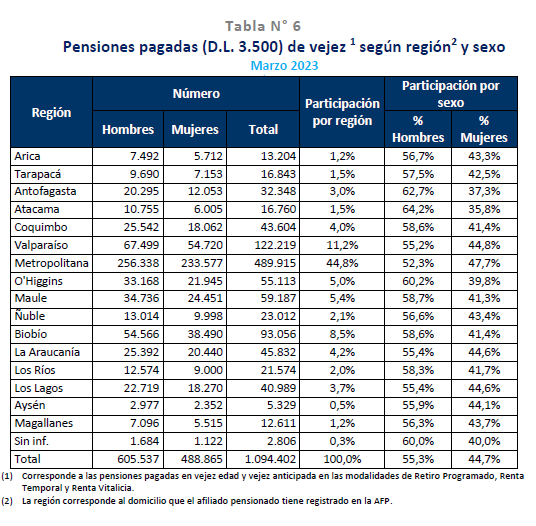


###  <center>Monto promedio pagado en pensiones (D.L. 3.500) autofinanciadas y con Aporte Previsional Solidario (APS) o Pensión Garantizada Universal (PGU) en vejez, según región y sexo</center>



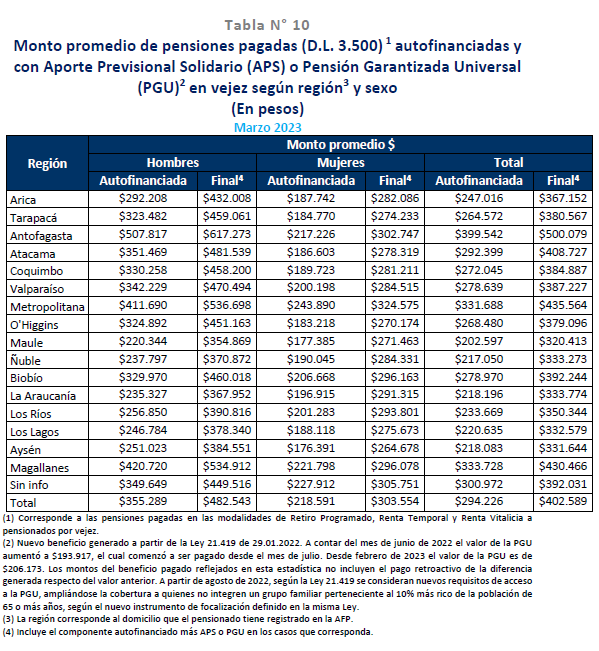 







###       Encuesta de Caracterización Socioeconómica Nacional 2022 (CASEN)




Para cumplir con el objetivo planteado, se utilizará la Encuesta de Caracterización Socioeconómica Nacional (CASEN) del año 2022. Esta encuesta resulta pertinente, ya que proporciona una amplia caracterización social de la población chilena.

Para analizar la relación entre la educación y el valor de la pensión pagada por las AFP, se considerarán como variable dependiente los años de educación de las personas, además de otras variables que permitan caracterizar a los individuos.

No obstante, basarse únicamente en los años de educación podría limitar considerablemente la comprensión del fenómeno en estudio. Por ello, sería ideal incorporar también dimensiones laborales y previsionales previas del sujeto, lo que permitiría obtener resultados más precisos.





## Pregunta de investigación 



### ¿Existe una relación significativa entre el nivel educacional de los jubilados y el monto de sus jubilaciones entregadas por las AFP? 



#### Hipótesis Nula (H0): 𝛽años de educación = 0


#### Hipótesis Alternativa (H1): 𝛽años de educación ≠ 0

#### La regla de decisión: 

Si el valor p es menor a 0.05, podemos rechazar la hipótesis nula y concluir que hay una relación significativa entre los años de educación y el monto pagado de jubilación.

Los tipos de error:

#### Error del Tipo I 
Sería aceptar que hay una relación significativa entre los años de educación y el monto pagado de jubilación cuando no la hay. Es decir, aceptar la hipótesis alternativa cuando la verdadera es la hipótesis nula. 


#### Error Tipo II
Implicaría rechazar una relación significativa entre los años de educación y el monto pagado de jubilación cuando sí hay relación significativa. Es decir, aceptar la hipotesis nula cuando la verdadera es la hipótesis alternativa. 


### Carga, revisión, limpieza y análisis descriptivo de los datos

Se trabajará con un archivo excel que contiene dicisiete variables. El archivo original, STATA; de la CASEN 2022 es muy grande y no se puede almacenar en el git hub. Las variables se extraen usando python  y se almacenan en un archivo excel. Lo demás se mantiene tal cual. 

In [106]:
df = pd.read_excel('datos_analisis.xlsx')
print(df.shape)
df.head()

(202231, 17)


,region,area,qaut,edad,sexo,esc,y7,yah1,yah2,yrut,yre1,yre2,yre3,y2803c,s13,v17,oficio1_08
0,16,2,2.0,72,2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN
1,16,2,2.0,67,1,4.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,9.0
2,16,2,2.0,40,2,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,3.0
3,16,2,1.0,56,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN
4,16,2,1.0,25,2,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN


In [107]:
# Listar el tipo de dato de cada variable a estudiar 

# Generar lista con las variables a revisar
variables_interesantes = [
'region','area','qaut','edad','sexo','esc',
'y7', 'yah1','yah2', 'yrut', 'yre1','yre2', 'yre3',
'y2803c', 's13', 'v17', 'oficio1_08'
]

# Obtener los tipos de datos de las variables seleccionadas
tipos_de_datos = df[variables_interesantes].dtypes

# Visualizar las filas deseadas
print(tipos_de_datos.head(25))

region          int64
area            int64
qaut          float64
edad            int64
sexo            int64
esc           float64
y7            float64
yah1          float64
yah2          float64
yrut          float64
yre1          float64
yre2          float64
yre3          float64
y2803c        float64
s13             int64
v17           float64
oficio1_08    float64
dtype: object


### <center>Cuadro de las variables</center>   

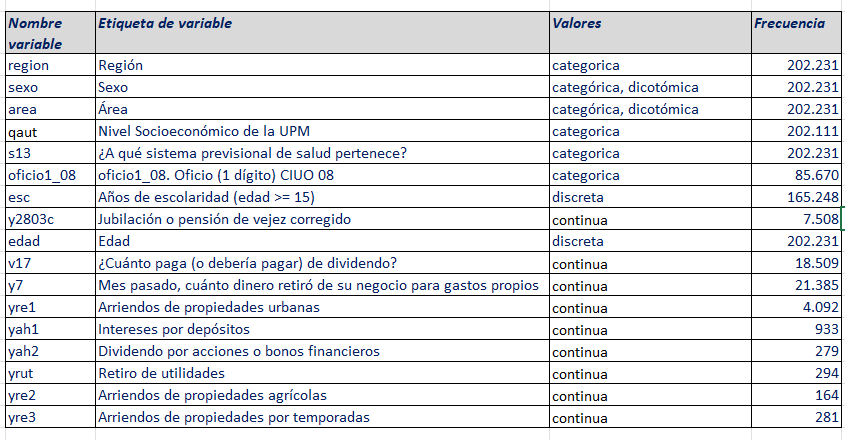

In [109]:
# limpieza de datos

df = df[df['y7'] != -88]
df = df[df['s13'] != -88]
df = df[df['v17'] != -88]


# Crear un nuevo DataFrame con las columnas concatenadas
new_df = pd.concat([df, pd.DataFrame({'sexo_dic': df['sexo'].replace({1: 0, 2: 1}),
                                      'area_dic': df['area'].replace({1: 0, 2: 1})})], axis=1)

# Si es necesario, puedes asignar el nuevo DataFrame de vuelta a 'df'
df = new_df.copy()


In [110]:
# Estadistica descriptiva de las variables seleccionadas:

columnas=['region','area_dic','qaut','edad','sexo_dic','esc',
'y7', 'yah1','yah2', 'yrut', 'yre1','yre2', 'yre3',
'y2803c', 's13', 'v17'
]

estadistica = df[columnas].describe().round(0)

# Obtener el índice del DataFrame estadistica
columnas_estadistica = estadistica.index

# Seleccionar solo algunos estadísticos específicos
estadisticos_seleccionados = estadistica.loc[columnas_estadistica.isin(['count', 'min', 'max', 'mean', 'std'])]

# Transponer el DataFrame (intercambiar filas y columnas)
estadisticos_seleccionados_transpuesto = estadisticos_seleccionados.transpose()

# Mostrar el DataFrame transpuesto
print("\nEstadística Descriptiva:")
(estadisticos_seleccionados_transpuesto)


Estadística Descriptiva:


,count,mean,std,min,max
region,198372.0,9.0,4.0,1.0,16.0
area_dic,198372.0,0.0,0.0,0.0,1.0
qaut,198260.0,3.0,1.0,1.0,5.0
edad,198372.0,39.0,23.0,0.0,120.0
sexo_dic,198372.0,1.0,0.0,0.0,1.0
esc,161939.0,11.0,4.0,0.0,29.0
y7,22596.0,452331.0,810807.0,0.0,40000000.0
yah1,927.0,90836.0,356969.0,83.0,6000000.0
yah2,276.0,203000.0,656081.0,167.0,5416667.0
yrut,292.0,693334.0,1501038.0,417.0,16666667.0


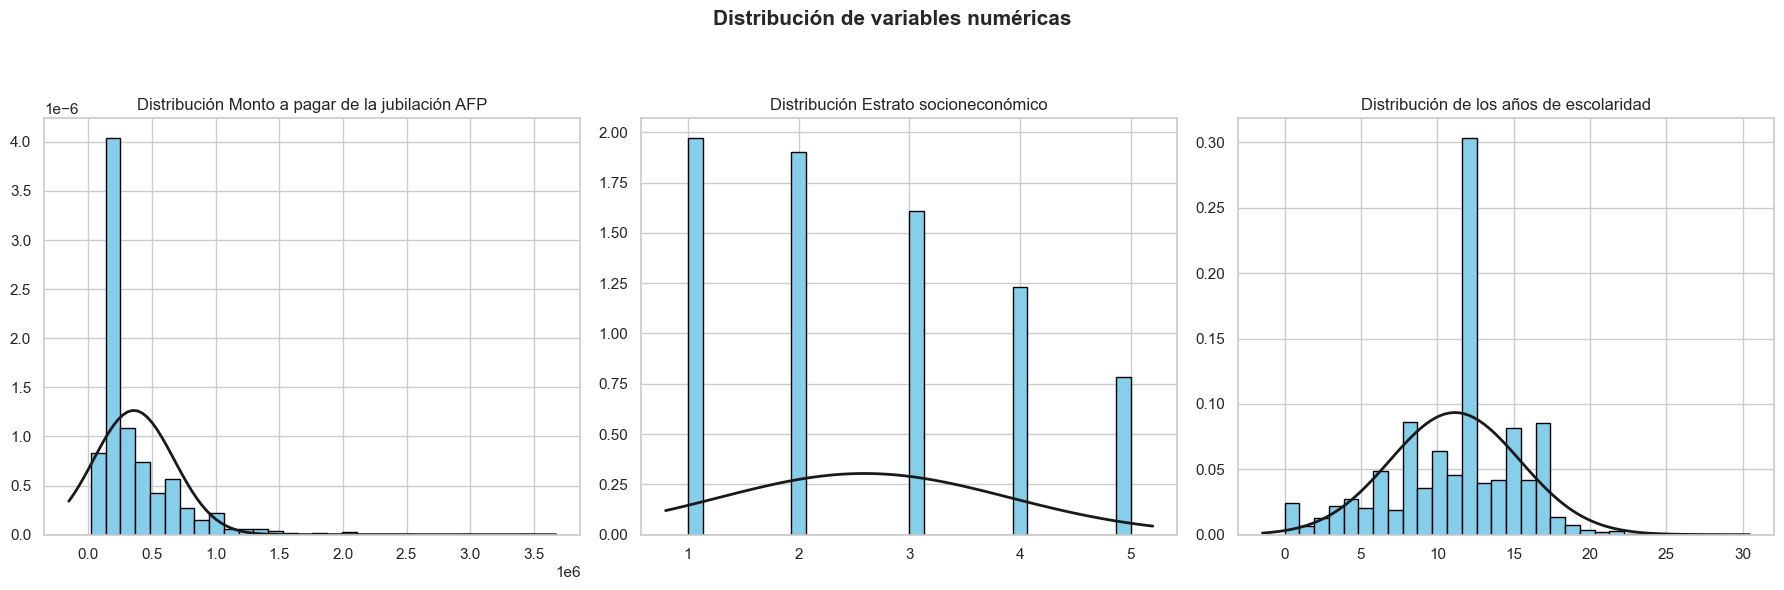

In [111]:
# Crear una figura y subgráficos (subplots)
fig, axs = plt.subplots(1, 3, figsize=(18, 6))


# Subgráfico 1 - Histograma de Años de Escolaridad
axs[0].hist(df['y2803c'], bins=30, color='skyblue', edgecolor='black', density=True)

# Ajuste de distribución normal
xmin, xmax = axs[0].get_xlim()
x = np.linspace(xmin, xmax, 100)

# Utilizar la media y la desviación estándar de la columna
mean_y2803c = np.mean(df['y2803c'])
std_y2803c = np.std(df['y2803c'])
p = norm.pdf(x, mean_y2803c, std_y2803c)

axs[0].plot(x, p, 'k', linewidth=2)
axs[0].set_title('Distribución Monto a pagar de la jubilación AFP')


# Subgráfico 2 - Histograma de Años de Escolaridad
axs[1].hist(df['qaut'], bins=30, color='skyblue', edgecolor='black', density=True)

# Ajuste de distribución normal
xmin, xmax = axs[1].get_xlim()
x = np.linspace(xmin, xmax, 100)

# Utilizar la media y la desviación estándar de la columna
mean_qaut = np.mean(df['qaut'])
std_qaut = np.std(df['qaut'])

# Utilizar la media y la desviación estándar de la columna
p = norm.pdf(x, mean_qaut, std_qaut)

axs[1].plot(x, p, 'k', linewidth=2)
axs[1].set_title('Distribución Estrato socioneconómico')


# Subgráfico 2 - Histograma de Años de Escolaridad
axs[2].hist(df['esc'], bins=30, color='skyblue', edgecolor='black', density=True)

# Ajuste de distribución normal
xmin, xmax = axs[2].get_xlim()
x = np.linspace(xmin, xmax, 100)

# Utilizar la media y la desviación estándar de la columna
mean_esc = np.mean(df['esc'])
std_esc = np.std(df['esc'])

# Utilizar la media y la desviación estándar de la columna
p = norm.pdf(x, mean_esc, std_esc)

axs[2].plot(x, p, 'k', linewidth=2)
axs[2].set_title('Distribución de los años de escolaridad')


fig.tight_layout()
plt.subplots_adjust(top=0.8)  # Ajuste para que el título no se solape con los subgráficos
fig.suptitle('Distribución de variables numéricas', fontsize=15, fontweight="bold")
plt.show()

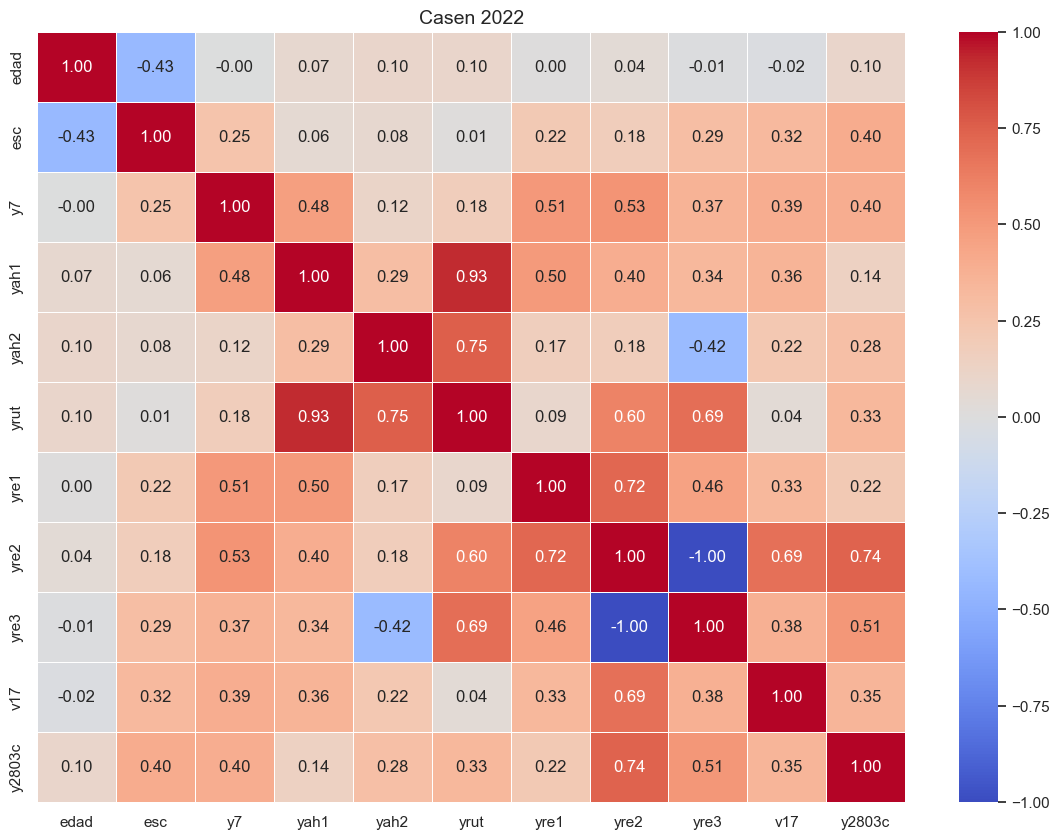

In [112]:
# Selecciona las columnas de interés
columnas_interes = df[['edad','esc', 'y7', 'yah1',
                       'yah2', 'yrut', 'yre1','yre2', 
                       'yre3', 'v17', 'y2803c'
                       ]]

# Configura el estilo de Seaborn
sns.set(style="whitegrid")

# Crea un mapa de calor a partir de las columnas seleccionadas
plt.figure(figsize=(14, 10))  # Tamaño de la figura
sns.heatmap(columnas_interes.corr(), annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")  # Calcula la correlación 
                                                                                   # y muestra los valores

plt.title("Casen 2022", fontsize=14)  
plt.show()

El monto de la jubilación recibido por los adultos mayores, es parte del módulo ingresos. La dimensión aborda las diferentes categorías de ingresos que reciben las personas y los hogares, esto es, los ingresos primarios, constituidos por los ingresos provenientes del trabajo (de los asalariados y de los empleadores y trabajadores por cuenta propia) y de la propiedad (retornos por activos financieros y no financieros), así como las transferencias corrientes, compuestas por las jubilaciones, pensiones y montepíos, los subsidios o transferencias monetarias del Estado y las diversas transferencias corrientes entre hogares.


Las preguntas de la CASEN miden todos los tipos pensiones que se perciben. Sin embargo, para este estudio solo estudiaremos la variable; monto de jubilación entregada por las AFP corregida, denominada: ‘y2803c’, se excluye todos los otros ingresos entregados por el Estado; tal como la APS y la PGU.

Se ha querido estudiar el fenómeno de las jubilaciones en relación a las variables que se presentan en el estudio, del tipo de caracterización e identificación tales como el sexo, región, estrato social, etc. 


## Regresiones



### Especificación. 



La función base es entre el monto de la jubilacion entregado por la AFP y el nivel de educación:

$$ \text{Monto jubilacion AFP} = f(Educacion))$$


### Modelo poblaciónal y estimación

Modelo según la población:

$$ \text{Monto de la jubilación AFP}_i = \alpha + \beta \text{Años de educación}_i + \mu_i$$

Estimadores para la muestra:

$$\hat{ \text{Monto de la Jubilacion AFP}}_i = \hat{\alpha} + \hat{\beta} \text{Años de educación}_i $$




## Regresión Lineal Simple 

### Primer modelo:

En este modelo los datos se agruparon en la variable categórica región, quedando la muestra con solo 16 casos para hacer la regresión.


Modelo según la población:

### $$ \text{Monto de la jubilación AFP}_i = \alpha + \beta \text{Años de educación}_i + \mu_i$$

### Datos agrupados por región

In [119]:
# Agrupar por 'region' y aplicar funciones de agregación
#df_prep = df.agg({'y28_2c': 'mean', 'y1': 'mean'}).reset_index()
df_regiones = df.groupby('region').agg({'y2803c': 'mean', 'esc': 'mean'}).reset_index()

# Resultados agregados por región
df_regiones.head(30)


,region,y2803c,esc
0,1,328890.517375,11.563784
1,2,344992.243056,11.716684
2,3,339083.072519,11.063391
3,4,338381.748031,10.917202
4,5,383196.991407,11.462059
5,6,322602.229656,10.549499
6,7,281480.021033,10.306163
7,8,359100.048780,10.972305
8,9,300087.055416,10.385506
9,10,306333.966480,10.142479


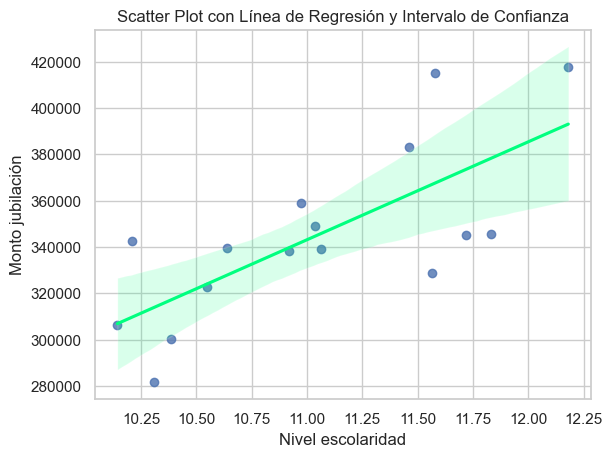

In [120]:
# DataFrame a analizar
sns.regplot(data=df_regiones, y='y2803c', x='esc', ci=95, line_kws={'color': 'springgreen'}) 

# El argumento ci controla el intervalo de confianza
plt.ylabel('Monto jubilación')
plt.xlabel('Nivel escolaridad')
plt.title('Scatter Plot con Línea de Regresión y Intervalo de Confianza')
plt.show()

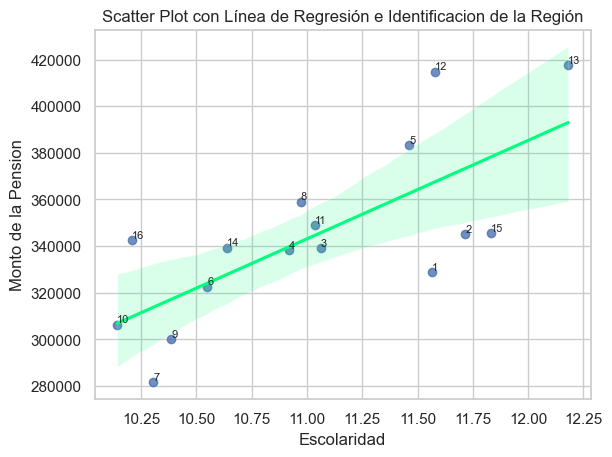

In [121]:
# DataFrame a analizar
sns.regplot(df_regiones, y='y2803c', x='esc', ci=95, line_kws={'color': 'springgreen'}) # El argumento ci controla el intervalo de confianza

# Procesar y agregar etiquetas de región a los puntos
for i, label in enumerate(df_regiones['region']):
    last_word = str(label).split()[-1]  # Obtener la última palabra de la etiqueta
    plt.text(df_regiones['esc'][i], df_regiones['y2803c'][i], last_word, fontsize=8, ha='left', va='bottom')

plt.ylabel('Monto de la Pension')
plt.xlabel('Escolaridad')
plt.title('Scatter Plot con Línea de Regresión e Identificacion de la Región')
plt.show()

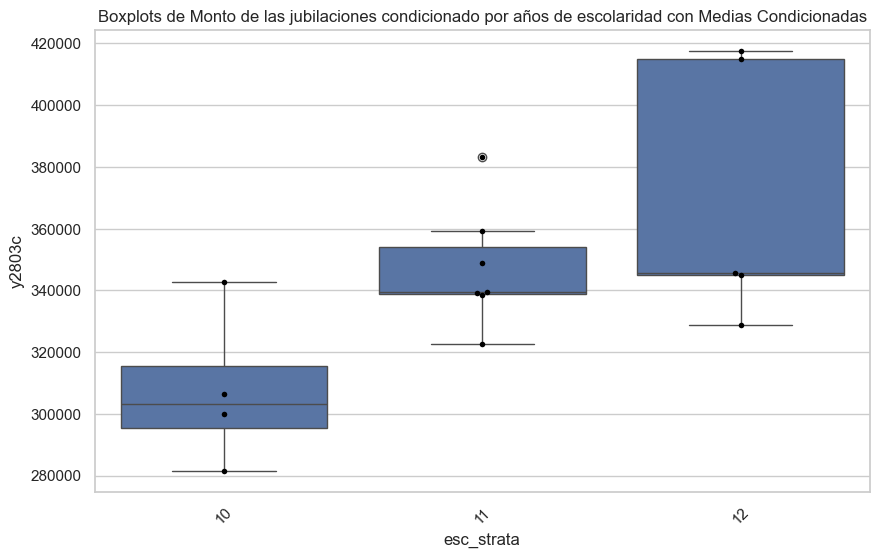

In [122]:
# Crear una nueva columna 'esc_strata' con los valores redondeados de 'esc'
df_regiones['esc_strata'] = df_regiones['esc'].round().astype(int)

# Crear el gráfico de boxplots
plt.figure(figsize=(10, 6))  # Tamaño del gráfico
sns.boxplot(data=df_regiones, x='esc_strata', y='y2803c')

# Agregar puntos para mostrar las medias condicionadas
sns.swarmplot(data=df_regiones, x='esc_strata', y='y2803c', color='black', size=4)

plt.xlabel('esc_strata')
plt.ylabel('y2803c')
plt.title('Boxplots de Monto de las jubilaciones condicionado por años de escolaridad con Medias Condicionadas')
plt.xticks(rotation=45)  # Rotar etiquetas del eje x si es necesario

plt.show()

In [123]:
# Eliminar filas con valores NaN
df_clean = df_regiones.dropna(subset=['y2803c', 'esc'])

# Agregar una columna de constantes para el término constante en el modelo
df_clean['constante'] = 1

# Definir las variables dependiente e independiente
y = df_clean['y2803c']
X = df_clean[['constante', 'esc']]  # Usar 'constante' como término constante

# Ajustar el modelo de regresión lineal
simple_agrup_region = sm.OLS(y, X).fit()

# Imprimir un resumen del modelo
print(simple_agrup_region.summary())

# Prueba de hipótesis sobre la variable de escolaridad
print("\nPrueba de hipótesis:")
print("\nH0: La escolaridad no tiene efecto significativo en el monto a pagar de la jubilacion de la AFP")
print("H1: La escolaridad tiene un efecto significativo en el monto a pagar de la jubilacion de la AFP")

# Definimos nuestra hipótesis nula
# El valor p está asociado con la variable escolaridad (coeficiente)
valor_p_escolaridad = simple_agrup_region.pvalues[1]

# Nivel de significancia (usualmente 0.05)
nivel_significancia = 0.05

if valor_p_escolaridad < nivel_significancia:
    print(f"\nEl valor p es {valor_p_escolaridad}, por lo tanto, rechazamos la hipótesis nula.")
    print("\nLa escolaridad tiene un efecto significativo en el monto a pagar de la jubilacion de la AFP.")
else:
    print(f"\nEl valor p es {valor_p_escolaridad}, por lo tanto, no podemos rechazar la hipótesis nula.")
    print("\nNo hay suficiente evidencia para afirmar que la escolaridad tenga un efecto significativo en el monto a pagar de la jubilacion de la AFP.")


                            OLS Regression Results                            
Dep. Variable:                 y2803c   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     15.85
Date:                Sat, 04 Jan 2025   Prob (F-statistic):            0.00137
Time:                        23:56:30   Log-Likelihood:                -184.31
No. Observations:                  16   AIC:                             372.6
Df Residuals:                      14   BIC:                             374.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constante  -1.218e+05   1.17e+05     -1.038      0.3

C:\Users\Paula\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\Paula\AppData\Local\Temp\ipykernel_1164\41172442.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  valor_p_escolaridad = simple_agrup_region.pvalues[1]


#### Interpretación del modelo



La constante (𝛽0) cuyo valor es -125059.781 representa el valor esperado del monto de la jubilación cuando todas las variables independientes son cero. Sin embargo, en el contexto de la escolaridad no es significativa. 

El coeficiente de escolaridad (𝛽Años de educación cuyo valor es 42548.134) indica que por cada año de estudio el monto de la jubilación pagada por la AFP aumenta en 42.548 pesos.   

Dado que el coeficiente de escolaridad es positivo, se interpreta que un aumento en la escolaridad está asociado con un aumento en el monto de la jubilación, el resto se mantiene constante.









### Segundo modelo:

A la agrupación regional se suma la agrupación de la variable área, lo cual por el cruce de las variables se obtiene una muestra de 32 casos. 

Se mantiene el modelo de regresión lineal simple porque se mantiene la variable dependiente educación y no se agrega otra variable al modelo. 


Modelo según la población:


### $$ \text{Monto de la jubilación AFP}_i = \alpha + \beta \text{Años de educación}_i + \mu_i$$


### Datos agrupados por región y área





Mínimo de escolaridad:8.7
Máximo de escolaridad:12.3
Mínimo de jubilación: 241724.0
Máximo de jubilación: (425811, 1)


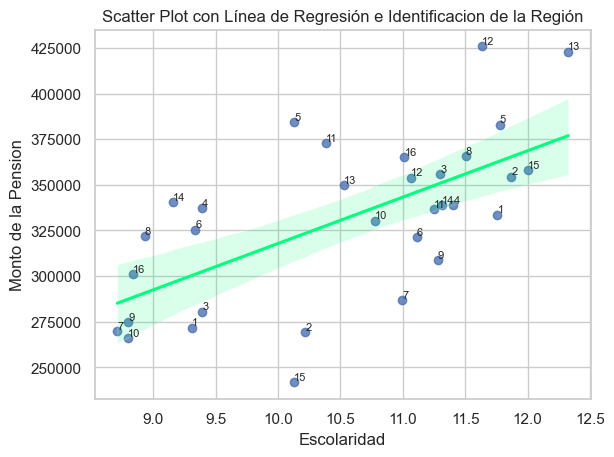

In [126]:
# Agrupar por 'region' y área 
df_agrupado = df.groupby(['region','area']).agg({'y2803c': 'mean', 'esc': 'mean'}).reset_index()

# Resultados agregados 
df_agrupado.head(20)

# Obtener los valores mínimos y máximos

min_esc = df_agrupado['esc'].min()
max_esc = df_agrupado['esc'].max()

min_jub = df_agrupado['y2803c'].min()
max_jub = df_agrupado['y2803c'].max()

# Imprimir los resultados
print(f'Mínimo de escolaridad:{round(min_esc, 1)}')
print(f'Máximo de escolaridad:{round(max_esc, 1)}')
print(f'Mínimo de jubilación: {round(min_jub, 1)}')
print(f'Máximo de jubilación: {round(max_jub), 1}')

# DataFrame a analizar
sns.regplot(df_agrupado, y='y2803c', x='esc', ci=95, line_kws={'color': 'springgreen'}) # El argumento ci controla el intervalo de confianza

# Procesar y agregar etiquetas de región a los puntos
for i, label in enumerate(df_agrupado['region']):
    last_word = str(label).split()[-1]  # Obtener la última palabra de la etiqueta
    plt.text(df_agrupado['esc'][i], df_agrupado['y2803c'][i], last_word, fontsize=8, ha='left', va='bottom')

plt.ylabel('Monto de la Pension')
plt.xlabel('Escolaridad')
plt.title('Scatter Plot con Línea de Regresión e Identificacion de la Región')
plt.show()

In [127]:
# Eliminar filas con valores NaN
df_agrupado = df_agrupado.dropna(subset=['y2803c', 'esc', 'region','area'])

# Agregar una columna de constantes para el término constante en el modelo
df_agrupado['constante'] = 1


# Definir las variables dependiente e independiente
y = df_agrupado['y2803c']
X = df_agrupado[['constante', 'esc']]

# Ajustar el modelo de regresión lineal
simple_agrup_reg_area = sm.OLS(y, X).fit()

# Imprimir un resumen del modelo
print(simple_agrup_reg_area.summary())

# Prueba de hipótesis sobre la variable de escolaridad
print("\nPrueba de hipótesis:")
print("\nH0: La escolaridad no tiene efecto significativo en el monto a pagar de la jubilacion de la AFP")
print("H1: La escolaridad tiene un efecto significativo en el monto a pagar de la jubilacion de la AFP")

# Definimos nuestra hipótesis nula
# El valor p está asociado con la variable escolaridad (coeficiente)
valor_p_escolaridad = simple_agrup_reg_area.f_pvalue

# Nivel de significancia (usualmente 0.05)
nivel_significancia = 0.05

if valor_p_escolaridad < nivel_significancia:
    print(f"\nEl valor p es {valor_p_escolaridad}, por lo tanto, rechazamos la hipótesis nula.")
    print("\nLa escolaridad tiene un efecto significativo en el monto a pagar de la jubilacion de la AFP.")
else:
    print(f"\nEl valor p es {valor_p_escolaridad}, por lo tanto, no podemos rechazar la hipótesis nula.")
    print("\nNo hay suficiente evidencia para afirmar que la escolaridad tenga un efecto significativo en el monto a pagar de la jubilacion de la AFP.")


                            OLS Regression Results                            
Dep. Variable:                 y2803c   R-squared:                       0.403
Model:                            OLS   Adj. R-squared:                  0.383
Method:                 Least Squares   F-statistic:                     20.26
Date:                Sat, 04 Jan 2025   Prob (F-statistic):           9.48e-05
Time:                        23:56:31   Log-Likelihood:                -379.47
No. Observations:                  32   AIC:                             762.9
Df Residuals:                      30   BIC:                             765.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constante   6.397e+04   5.96e+04      1.073      0.2

#### Interpretación del modelo



La constante (63960) representa el valor esperado del monto de la jubilación cuando todas las variables independientes son cero.  Sin embargo en este contexto no tiene significado práctico.

El coeficiente de escolaridad (25390) significa que el aumento en un año de escolaridad se asocia con un aumento de 25.390 pesos  en el monto de la jubilación, manteniendo constantes las otras variables en el modelo.

La significancia del modelo en conjunto (Prob (F-statistic)) y el porcentaje de variabilidad explicada (R-squared) sugieren que este modelo tiene utilidad para explicar el monto de la jubilación en el contexto específico de la agrupación por región y área.

### Tercer modelo:

El modelo se aplica a la muestra total sin agrupamiento de ningún tipo. Lo que se obtiene una muestra de 7349 casos. 


Solo se mantiene la variable dependiente educación y no se agrega otra variable al modelo por lo tanto, se mantiene el mismo modelo que describe la relación. 

Modelo según la población:


### $$ \text{Monto de la jubilación AFP}_i = \alpha + \beta \text{Años de educación}_i + \mu_i$$


### Datos totales 



In [130]:
# Eliminar filas con valores NaN
df_clean = df.dropna(subset=['y2803c', 'esc'])

# Agregar una columna de constantes para el término constante en el modelo
df_clean['constante'] = 1


# Definir las variables dependiente e independiente
y = df_clean['y2803c']
X = df_clean[['constante', 'esc']]

# Ajustar el modelo de regresión lineal
simple_totaldatos = sm.OLS(y, X).fit()

# Imprimir un resumen del modelo
print(simple_totaldatos.summary())

# Prueba de hipótesis sobre la variable de escolaridad
print("\nPrueba de hipótesis:")
print("\nH0: La escolaridad no tiene efecto significativo en el monto a pagar de la jubilacion de la AFP")
print("H1: La escolaridad tiene un efecto significativo en el monto a pagar de la jubilacion de la AFP")

# Definimos nuestra hipótesis nula
# El valor p está asociado con la variable escolaridad (coeficiente)
valor_p_escolaridad = simple_totaldatos.f_pvalue

# Nivel de significancia (usualmente 0.05)
nivel_significancia = 0.05

if valor_p_escolaridad < nivel_significancia:
    print(f"\nEl valor p es {valor_p_escolaridad}, por lo tanto, rechazamos la hipótesis nula.")
    print("\nLa escolaridad tiene un efecto significativo en el monto a pagar de la jubilacion de la AFP.")
else:
    print(f"\nEl valor p es {valor_p_escolaridad}, por lo tanto, no podemos rechazar la hipótesis nula.")
    print("\nNo hay suficiente evidencia para afirmar que la escolaridad tenga un efecto significativo en el monto a pagar de la jubilacion de la AFP.")


                            OLS Regression Results                            
Dep. Variable:                 y2803c   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     1431.
Date:                Sat, 04 Jan 2025   Prob (F-statistic):          3.04e-286
Time:                        23:56:31   Log-Likelihood:            -1.0284e+05
No. Observations:                7349   AIC:                         2.057e+05
Df Residuals:                    7347   BIC:                         2.057e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constante   1.036e+05   7509.355     13.796      0.0

C:\Users\Paula\AppData\Local\Temp\ipykernel_1164\3179688488.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['constante'] = 1



#### Interpretación del modelo



En relación a los coeficientes que son parte de la regresión:

La constante (103600) representa el valor esperado del monto de la jubilación cuando todas las variables independientes son cero. En este contexto no tiene significado. 


El coeficiente de escolaridad (25860) indica que por cada cada de estudios formales el monto de la jubilación se ve incrementado en 25.860 pesos,  manteniendo constantes otras variables en el modelo.

En resumen, según este modelo, la escolaridad tiene un impacto significativo en el monto de la jubilación. Un aumento en la escolaridad se asocia con un aumento de 26050 unidades en el monto de la jubilación, manteniendo constantes otras variables en el modelo.

La significancia del modelo en conjunto (Prob (F-statistic)) y el porcentaje de variabilidad explicada (R-squared) sugieren que este modelo tiene utilidad para explicar el monto de la jubilación en el contexto de los datos totales.








## Regresión Lineal Múltiple 


A partir de este momento se empieza con el enriquecimiento del modelo. A la variable educación se le agrega la variable dicotómica sexo, se suma además la interacción entre esta variable y la variable educación

### Cuarto modelo:

Modelo según la población:


### $$ \text{Monto de la jubilación AFP}_i = \beta_0 + \beta_1 educ+ \beta_2 sexo + (\beta_1 educ* \beta_2 sexo) +u $$


### Datos enriquecidos 


C:\Users\Paula\AppData\Local\Temp\ipykernel_1164\2659305246.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clear['constante'] = 1
C:\Users\Paula\AppData\Local\Temp\ipykernel_1164\2659305246.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  valor_p_escolaridad = modelo.pvalues[1]


sexo_dic
1    104859
0     93513
Name: count, dtype: int64 

                            OLS Regression Results                            
Dep. Variable:                 y2803c   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     1043.
Date:                Sat, 04 Jan 2025   Prob (F-statistic):               0.00
Time:                        23:56:31   Log-Likelihood:            -1.0219e+05
No. Observations:                7349   AIC:                         2.044e+05
Df Residuals:                    7345   BIC:                         2.044e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

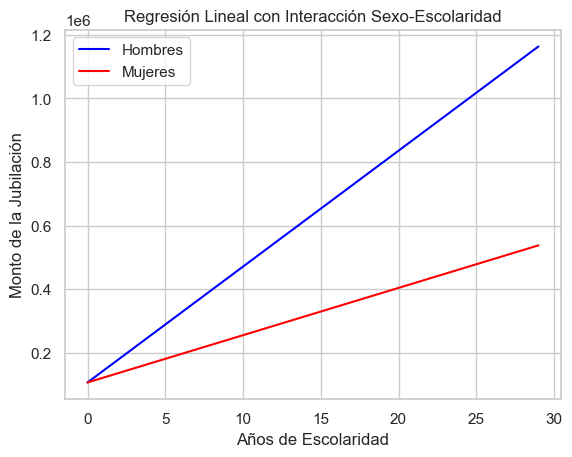

In [133]:
# Columna a estudiar
frecuencia_sex_dic = df['sexo_dic'].value_counts()

# Mostrar la frecuencia de la variable 
print(frecuencia_sex_dic,"\n")

# Crear una variable de interacción entre 'esc' y 'sexo'
df['interaccion_sexo_esc'] = df['esc'] * df['sexo_dic']

# Eliminar filas con valores NaN
df_clear = df.dropna(subset=['y2803c', 'esc', 'sexo_dic', 'interaccion_sexo_esc'])

# Agregar una columna de constantes para el término constante en el modelo
df_clear['constante'] = 1


# Ajustar el modelo de regresión lineal con la variable de interacción
modelo = sm.OLS(df_clear['y2803c'], sm.add_constant(df_clear[['constante','esc', 'sexo_dic', 'interaccion_sexo_esc']])).fit()

# Obtener los resultados de la regresión
resultados = modelo.summary()
print(resultados)

# Prueba de hipótesis sobre la variable de escolaridad
print("\nPrueba de hipótesis:")
print("\nH0: La escolaridad no tiene efecto significativo en el monto a pagar de la jubilación de la AFP")
print("H1: La escolaridad tiene un efecto significativo en el monto a pagar de la jubilación de la AFP")

# Definimos nuestra hipótesis nula
# El valor p está asociado con la variable escolaridad (coeficiente)
valor_p_escolaridad = modelo.pvalues[1]

# Nivel de significancia (usualmente 0.05)
nivel_significancia = 0.05

if valor_p_escolaridad < nivel_significancia:
    print(f"\nEl valor p es {valor_p_escolaridad}, por lo tanto, rechazamos la hipótesis nula.")
    print("\nLa escolaridad tiene un efecto significativo en el monto a pagar de la jubilación de la AFP.")
else:
    print(f"\nEl valor p es {valor_p_escolaridad}, por lo tanto, no podemos rechazar la hipótesis nula.")
    print("\nNo hay suficiente evidencia para afirmar que la escolaridad tenga un efecto significativo en el monto a pagar de la jubilación de la AFP.")

# Define esc_range, por ejemplo, de 0 a 20 con cierto paso
esc_range = np.arange(0, 30, 1)

# Graficar la regresión
plt.xlabel('Años de Escolaridad')
plt.ylabel('Monto de la Jubilación')
plt.title('Regresión Lineal con Interacción Sexo-Escolaridad')

# Añadir la línea de regresión para hombres
interaccion_sexo_hombres = 0  # Si el sexo es 0 (hombres), la interacción es 0
y_pred_hombres = modelo.params['constante'] + modelo.params['esc'] * esc_range + interaccion_sexo_hombres * modelo.params['interaccion_sexo_esc'] * esc_range
plt.plot(esc_range, y_pred_hombres, color='blue', label='Hombres')

# Añadir la línea de regresión para mujeres
interaccion_sexo_mujeres = 1  # Si el sexo es 1 (mujeres), la interacción es 1
y_pred_mujeres = modelo.params['constante'] + modelo.params['esc'] * esc_range + interaccion_sexo_mujeres * modelo.params['interaccion_sexo_esc'] * esc_range
plt.plot(esc_range, y_pred_mujeres, color='red', label='Mujeres')

plt.legend()
plt.show()


#### Interpretación del modelo


En consideración a los coeficientes:

La constante (107100): Representa el valor esperado del monto de la jubilación cuando todas las variables independientes son cero. En este caso no tiene significado su valor.

Escolaridad (36400): Indica que por cada año más de escolaridad el monto de la pensión aumenta en 36.400 pesos mensuales. manteniendo constante el efecto de otras variables en el modelo. 

Sexo (4246.0585): Representa el efecto adicional en el monto de la jubilación cuando la variable sexo es 1 (mujer) en comparación con la variable es 0 (hombre). En este caso las mujeres, en promedio,  tendrían un monto de jubilación mayor,  en comparación a los hombres a igual nivel de educación. El sueldo para ellas aumenta en 4.246 pesos. Lo demás se mantiene constante

Interacción sexo y escolaridad (-21550): Pero cuando la variable sexo interacciona con la variable educación el resultado es lo opuesto. Dado que es negativo (21.550), se sugiere que la relación entre la escolaridad y el monto de la jubilación es menor para las mujeres en comparación a los hombres a igual nivel de escolaridad. Un año más de educación para las mujeres significa 14.492 pesos de jubilación mensual.

En resumen, el nivel de escolaridad está positivamente relacionado con el monto de la jubilación. Además, hay un efecto adicional positivo en el monto de la jubilación para las mujeres en comparación con los hombres. 

Sin embargo, el resultado de la la interacción  negativa sugiere que el impacto de la escolaridad es menor para las mujeres en comparación con los hombres. Lo que se puede explicar en que en la variable sexo las mujeres contienen algunos valores más altos que distorsionan el resultado del coeficiente. 







### Quinto modelo:

En este caso se elimina la variable sexo en el modelo de regresión.



Modelo según la población:

### $$ \text{Monto de la jubilación AFP}_i = \beta_0 + \beta_1 educ + (\beta_1 educ* \beta_2 sexo) +u $$


### Datos enriquecidos 


sexo_dic
1    104859
0     93513
Name: count, dtype: int64 

                            OLS Regression Results                            
Dep. Variable:                 y2803c   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.299
Method:                 Least Squares   F-statistic:                     1565.
Date:                Sat, 04 Jan 2025   Prob (F-statistic):               0.00
Time:                        23:56:32   Log-Likelihood:            -1.0219e+05
No. Observations:                7349   AIC:                         2.044e+05
Df Residuals:                    7346   BIC:                         2.044e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

C:\Users\Paula\AppData\Local\Temp\ipykernel_1164\1181799110.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clear['constante'] = 1
C:\Users\Paula\AppData\Local\Temp\ipykernel_1164\1181799110.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  valor_p_escolaridad = modelo_1.pvalues[1]


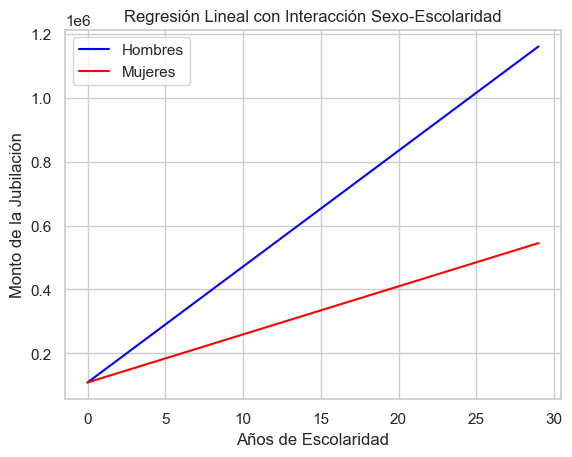

In [136]:
# Columna a estudiar
frecuencia_sex_dic = df['sexo_dic'].value_counts()

# Mostrar la frecuencia de la variable 
print(frecuencia_sex_dic,"\n")

# Crear una variable de interacción entre 'esc' y 'sexo'
df['interaccion_sexo_esc'] = df['esc'] * df['sexo_dic']

# Eliminar filas con valores NaN
df_clear = df.dropna(subset=['y2803c', 'esc', 'sexo_dic', 'interaccion_sexo_esc'])

# Agregar una columna de constantes para el término constante en el modelo
df_clear['constante'] = 1


# Ajustar el modelo de regresión lineal con la variable de interacción
modelo_1 = sm.OLS(df_clear['y2803c'], sm.add_constant(df_clear[['constante','esc', 'interaccion_sexo_esc']])).fit()

# Obtener los resultados de la regresión
resultados = modelo_1.summary()
print(resultados)

# Prueba de hipótesis sobre la variable de escolaridad
print("\nPrueba de hipótesis:")
print("\nH0: La escolaridad no tiene efecto significativo en el monto a pagar de la jubilación de la AFP")
print("H1: La escolaridad tiene un efecto significativo en el monto a pagar de la jubilación de la AFP")

# Definimos nuestra hipótesis nula
# El valor p está asociado con la variable escolaridad (coeficiente)
valor_p_escolaridad = modelo_1.pvalues[1]

# Nivel de significancia (usualmente 0.05)
nivel_significancia = 0.05

if valor_p_escolaridad < nivel_significancia:
    print(f"\nEl valor p es {valor_p_escolaridad}, por lo tanto, rechazamos la hipótesis nula.")
    print("\nLa escolaridad tiene un efecto significativo en el monto a pagar de la jubilación de la AFP.")
else:
    print(f"\nEl valor p es {valor_p_escolaridad}, por lo tanto, no podemos rechazar la hipótesis nula.")
    print("\nNo hay suficiente evidencia para afirmar que la escolaridad tenga un efecto significativo en el monto a pagar de la jubilación de la AFP.")

# Define esc_range, por ejemplo, de 0 a 20 con cierto paso
esc_range = np.arange(0, 30, 1)

# Graficar la regresión
plt.xlabel('Años de Escolaridad')
plt.ylabel('Monto de la Jubilación')
plt.title('Regresión Lineal con Interacción Sexo-Escolaridad')

# Añadir la línea de regresión para hombres
interaccion_sexo_hombres = 0  # Si el sexo es 0 (hombres), la interacción es 0
y_pred_hombres = modelo_1.params['constante'] + modelo_1.params['esc'] * esc_range + interaccion_sexo_hombres * modelo_1.params['interaccion_sexo_esc'] * esc_range
plt.plot(esc_range, y_pred_hombres, color='blue', label='Hombres')

# Añadir la línea de regresión para mujeres
interaccion_sexo_mujeres = 1  # Si el sexo es 1 (mujeres), la interacción es 1
y_pred_mujeres = modelo_1.params['constante'] + modelo_1.params['esc'] * esc_range + interaccion_sexo_mujeres * modelo_1.params['interaccion_sexo_esc'] * esc_range
plt.plot(esc_range, y_pred_mujeres, color='red', label='Mujeres')

plt.legend()
plt.show()

#### Interpretación del modelo 


Constante (1.092e+05): Es la estimación del monto de la jubilación cuando todas las demás variables son cero. En este caso no tiene sentido interpretarla. 

Escolaridad (3.623e+04): En este caso, un aumento de un año en la escolaridad se asocia con un aumento de 36.230 pesos en el monto de la jubilación a pagar.Lo demás se mantiene constante

Interacción entre escolaridad y sexo (-2.12e+04): Este coeficiente representa cómo la relación entre la escolaridad y el monto de jubilación difiere para diferentes valores de la variable sexo. En este caso, un aumento en la interacción se asocia con una disminución de 21.200 pesos en el monto de la jubilación pagada por la AFP mensualmente a las mujeres en comparación a los hombres a igual nivel educacional. Lo demás se mantiene constante.



### Sexto modelo:

En este modelo a la variable educación se le agrega la variable dicotómica área (rural, urbano). Variable que estará en interacción con la escolaridad dentro del módelo de regresión multiple.

Modelo según la población:

### $$ \text{Monto de la jubilación AFP}_i = \beta_0 + \beta_1 educ + (\beta_1 educ* \beta_2 área) +u $$


### Datos enriquecidos 

area_dic
0    158319
1     40053
Name: count, dtype: int64 

                            OLS Regression Results                            
Dep. Variable:                 y2803c   R-squared:                       0.164
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     478.8
Date:                Sat, 04 Jan 2025   Prob (F-statistic):          3.78e-284
Time:                        23:56:32   Log-Likelihood:            -1.0283e+05
No. Observations:                7349   AIC:                         2.057e+05
Df Residuals:                    7345   BIC:                         2.057e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

C:\Users\Paula\AppData\Local\Temp\ipykernel_1164\2603975039.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clear['constante'] = 1
C:\Users\Paula\AppData\Local\Temp\ipykernel_1164\2603975039.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  valor_p_escolaridad = modelo_area.pvalues[1]


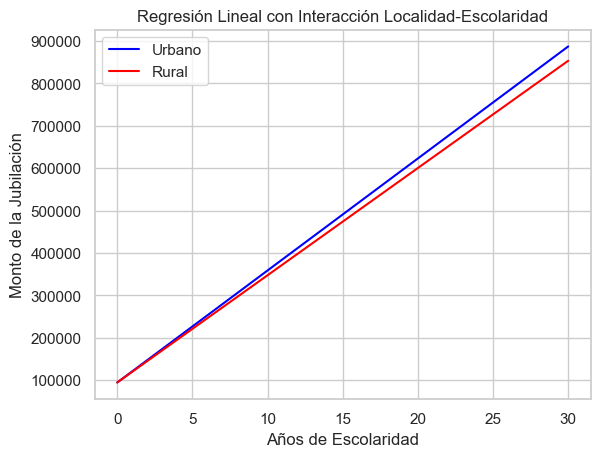

In [139]:
# Columna a estudiar
frecuencia_area_dic = df['area_dic'].value_counts()

# Mostrar la frecuencia de la variable 
print(frecuencia_area_dic,"\n")

# Crear una variable de interacción entre 'esc' y 'sexo'
df['interaccion_area_esc'] = df['esc'] * df['area_dic']

# Eliminar filas con valores NaN
df_clear = df.dropna(subset=['y2803c', 'esc', 'area_dic', 'interaccion_area_esc'])

# Agregar una columna de constantes para el término constante en el modelo
df_clear['constante'] = 1


# Ajustar el modelo de regresión lineal con la variable de interacción
modelo_area = sm.OLS(df_clear['y2803c'], sm.add_constant(df_clear[['constante','esc', 'area_dic', 'interaccion_area_esc']])).fit()

# Obtener los resultados de la regresión
resultados = modelo_area.summary()
print(resultados)

# Prueba de hipótesis sobre la variable de escolaridad
print("\nPrueba de hipótesis:")
print("\nH0: La escolaridad no tiene efecto significativo en el monto a pagar de la jubilación de la AFP")
print("H1: La escolaridad tiene un efecto significativo en el monto a pagar de la jubilación de la AFP")

# Definimos nuestra hipótesis nula
# El valor p está asociado con la variable escolaridad (coeficiente)
valor_p_escolaridad = modelo_area.pvalues[1]

# Nivel de significancia (usualmente 0.05)
nivel_significancia = 0.05

if valor_p_escolaridad < nivel_significancia:
    print(f"\nEl valor p es {valor_p_escolaridad}, por lo tanto, rechazamos la hipótesis nula.")
    print("\nLa escolaridad tiene un efecto significativo en el monto a pagar de la jubilación de la AFP.")
else:
    print(f"\nEl valor p es {valor_p_escolaridad}, por lo tanto, no podemos rechazar la hipótesis nula.")
    print("\nNo hay suficiente evidencia para afirmar que la escolaridad tenga un efecto significativo en el monto a pagar de la jubilación de la AFP.")

# Define esc_range, por ejemplo, de 0 a 20 con cierto paso
esc_range = np.arange(0, 31, 1)

# Graficar la regresión
plt.xlabel('Años de Escolaridad')
plt.ylabel('Monto de la Jubilación')
plt.title('Regresión Lineal con Interacción Localidad-Escolaridad')

# Añadir la línea de regresión para urbano
interaccion_area_urbana = 0  # Si el area es 0 (urbana), la interacción es 0
y_pred_hombres = modelo_area.params['constante'] + modelo_area.params['esc'] * esc_range + interaccion_area_urbana * modelo_area.params['interaccion_area_esc'] * esc_range
plt.plot(esc_range, y_pred_hombres, color='blue', label='Urbano')

# Añadir la línea de regresión para rural
interaccion_area_rural = 1  # Si el area es 1 (rural), la interacción es 1
y_pred_mujeres = modelo_area.params['constante'] + modelo_area.params['esc'] * esc_range + interaccion_area_rural * modelo_area.params['interaccion_area_esc'] * esc_range
plt.plot(esc_range, y_pred_mujeres, color='red', label='Rural')

plt.legend()
plt.show()


#### Interpretación del modelo 

Constante (94.400): Es la estimación del monto de la jubilación cuando todas las demás variables son cero (escolaridad, área, interacción). En este caso no es interpretable. 

Escolaridad (26.420): Indica que un año extra de educación formal se asocia con un aumento de 26.420 pesos en el monto de la jubilación. Lo demás se mantiene constante.

Area_(27.690): Representa el cambio esperado en el monto de la jubilación al comparar el área rural con el área urbana. Las personas jubiladas de las zonas rurales ganan  
27.690 pesos más en el monto de la jubilación en comparación a las personas de las zonas urbanas a igual nivel de estudios. Lo demás se mantiene constante.

Interacción área y escolaridad (-1126): Representa cómo la relación entre la escolaridad y la zona de residencia del jubilado difiere. En este caso, un año más de educación para los que viven en la zona rural significa la disminución de su monto de la jubilacion en 1.126  pesos en comparación a los que viven en zonas urbanas a igual nivel educacional. Lo demás se mantiene constante. 
    
La probabilidad asociada al estadístico F es extremadamente baja, lo que sugiere que al menos una de las variables explicativas en el modelo es significativamente diferente de cero.



## Comparación de Modelos 

In [142]:
stargazer = Stargazer([simple_agrup_region,simple_agrup_reg_area, simple_totaldatos, modelo, modelo_1, modelo_area])
# Configurar el título con dos líneas
stargazer.title("\nComparación de Modelos: Monto de la jubilación de la AFP.\n(valores expresados en pesos chilenos).")
stargazer.custom_columns(["Agrup_Reg", 'Agrup_Reg_y_area', 'No agrup_lineal', 'Interacción:Esc_sexo', 'Interacción_Esc', 'Interaccion:Area_esc'], [1, 1, 1, 1, 1, 1])  # Nombres de los modelos
stargazer.add_custom_notes(["Notas personalizadas para la tabla."])  # Notas personalizadas
stargazer

## Evaluación y Conclusiones

Tanto la revisión de los resultados propios de cada regresión como la revisión de la literatura y los informes de la Superintendencia de Pensiones permiten señalar que el modelo de la regresión cinco es el mejor, al considerar la diferencia significativa del monto de autofinancimiento de la pensión que se da entre hombres y mujeres es significativa, antecedente entregado por la superintendencia. 

La interacción de la variable sexo y educación muestra que la mujer tiene desventaja en comparación al hombre aun cuando tengan el mismo nivel de educación. Por otro lado, revisando y comparando los valores obtenidos de  cada regresión: $R^2$ ajustado**: 0.299, $R^2$: 0.299, Prob (F-statistic): 0.00, el AIC:  204.2y el BIC: 204.4, en su conjunto son valores acordes con la decisión. 

En este modelo, en relació a la escolaridad, se puede decir que un año de educación se asocia con un aumento de 36.230 pesos en el monto de la jubilación a pagar.Lo demás se mantiene constante. En tanto, la relación entre la escolaridad y el monto de jubilación difiere para diferentes valores de la variable sexo. Un aumento en la interacción se asocia con una disminución de 21.200 pesos en el monto de la jubilación pagada por la AFP mensualmente a las mujeres en comparación a los hombres a igual nivel educacional. Lo demás se mantiene constante. Es decir, el monto de 36.230 es para los hombres, pero para las mujeres es de 14.630 pesos.


Sin embargo, se puede considerar la omisión de variables relevantes para el análisis de este fenómeno. Por un lado se debe considerar variables propias de la vida laboral y previsional que tuvo el trabajador, tales como: años de cotizaciones, periodos sin cotización previsional,  saber si fue un trabajador dependiente o independiente, saber su monto imponible, saber el pago no imponible de su sueldo, dato no menor porque se sabe que las empresas tratan de bajar costos y el ciertos pagos no son imponibles y la empresa las usa para ahorrar a todo evento, saber si ahorro dinero en la modalidad APV, ahorro previsional voluntario, edad de jubilación, saber si la empresa entregó algún bono para que el trabajador jubilará y no siguiera trabajando.

De otro lado, se puede considerar variables externas asociadas a la dimensión del mercado laboral, tales como: la estabilidad ofrecida en los trabajos, es decir, qué tipo de contrato es más ofrecido por la empresa; indefinido, fijo, por faena u obra, conocer el sueldo imponible promedio del mercado laboral, saber el impacto de la flexibilización laboral en las cotizaciones de los trabajadores, variables asociadas a la tercerización de los trabajadores, es decir, saber el impacto que tiene todo cambio en el mercado laboral. 

En la revisión de la base de datos y sus variables, trabajo no menor, se constata y se ejercita que se debe tener clara la direccionalidad de la variable, es decir, en algún momento, se hizo la regresión lineal usando el estrato socioeconómico corregido, pero se determinó que no está claro si esta variable describe a la pensión o al revés si el monto de la pensión describe el estrato de la persona. 

Lo otro, ver mapa de calor, la relación que se da entre otros ingresos asociados al patrimonio y el monto de la pensión, es decir, refuerza la idea de que a mayor patrimonio mejor la pensión, pero de igual modo es un dato muy aislado, pero interesante de abordar, porque como se piensa, para una persona sería mejor imponer por el mínimo y destinar ese dinero en adquirir patrimonio para tener una mejor vejez.  
 
Expuesto lo anterior, se puede señalar que el resultado de la regresión solo aportaría al debate, pero por si sola no permite tomar alguna decisión en relación a aplicar alguna política pública.  Solo señalar que la educación es el pilar de todo país que quiere mejorar y salir de la pobreza, sin educación es dificil superar las dificultades presentes en la vida de la persona. 

Lo anterior describe tanto las fortalezas y debilidades de este trabajo, y en esa misma senda deja abierto el camino a otros trabajos futuros que mezclen las dimensiones anteriores: Mercado laboral, trayectoria laboral y previsional, caracterización del trabajador para determinar el peso de cada uno y así determinar donde se debe hacer hincapié a un fenómeno problemático que los gobiernos de turno deben sortear de la mejor manera.

## Bibliografía




Asociacion de AFP Chile. (2023). Recuperado de https://www.aafp.cl/

Superintendencia de Pensiones. SP (2023) Recuperado de https://www.spensiones.cl/portal/institucional/594/w3-channel.html

